In [19]:
# Install package for UCI repo
!pip install ucimlrepo
!pip install lime
!pip install shap

from ucimlrepo import fetch_ucirepo, list_available_datasets
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [20]:
# Download dataset
uci_dataset = fetch_ucirepo(id=53)
# alternatively: fetch_ucirepo(name='CDC Diabetes Health Indicators')
# access data
X = uci_dataset.data.features
y = uci_dataset.data.targets
print(uci_dataset.metadata)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the decision tree classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



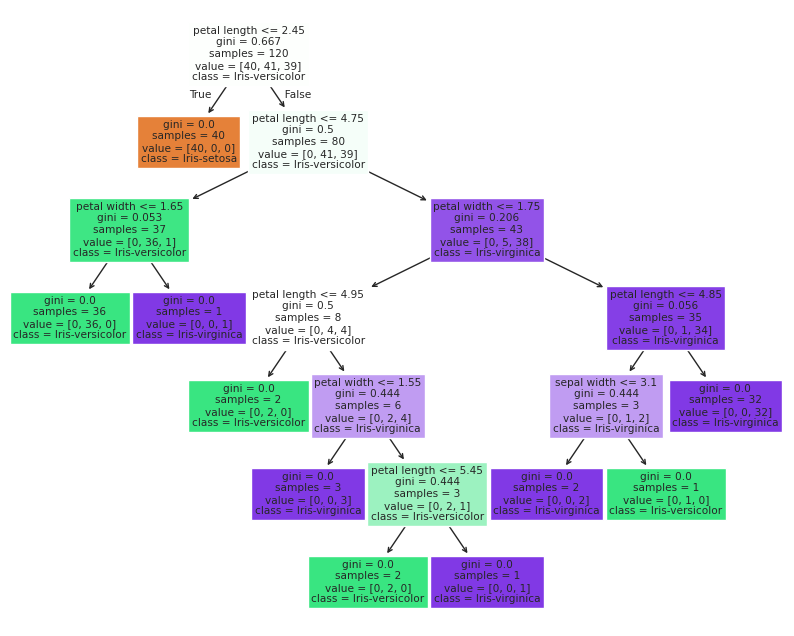

In [23]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, class_names=y['class'].unique(), feature_names=X.columns)
plt.show()

In [24]:
# Initialize a Random Forest classifier with 10 trees
rf = RandomForestClassifier(n_estimators=10, random_state=42)
# Train the model using the training data
rf.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


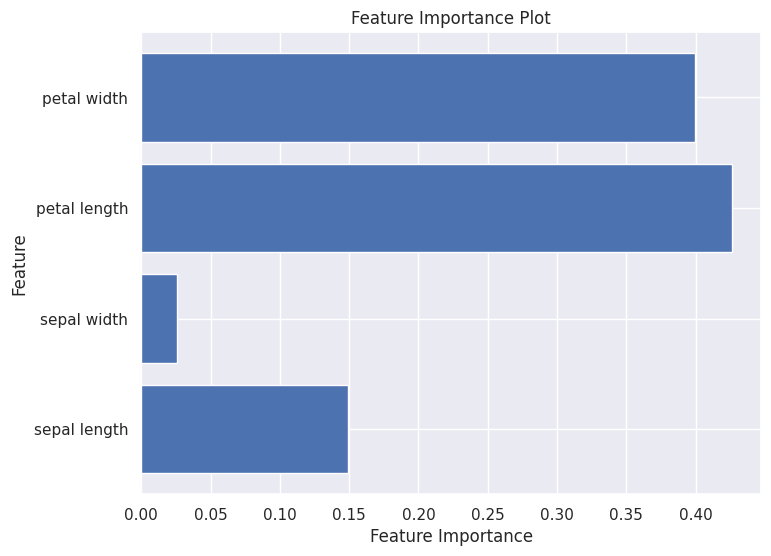

In [25]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a feature importance plot
sns.set()
plt.figure(figsize=(8, 6))
plt.barh(X.columns.values, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

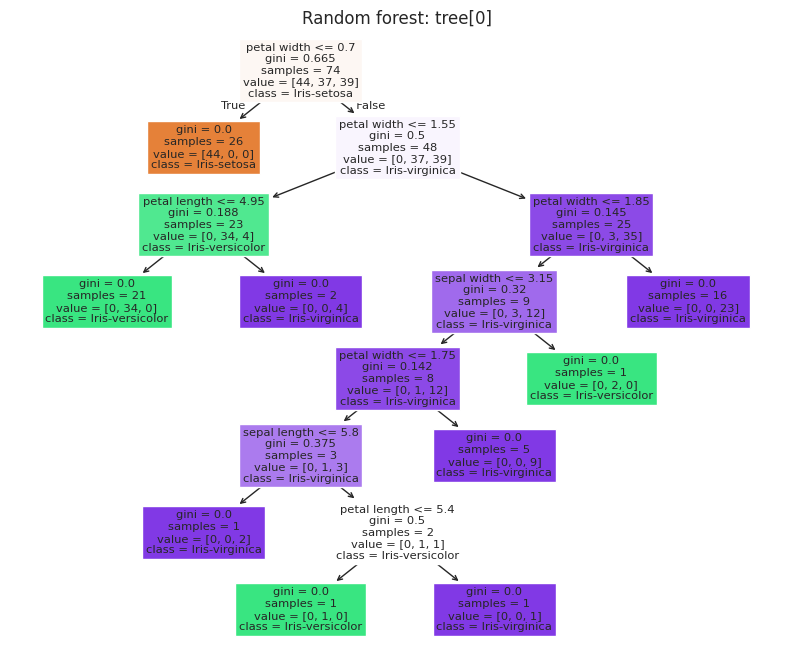

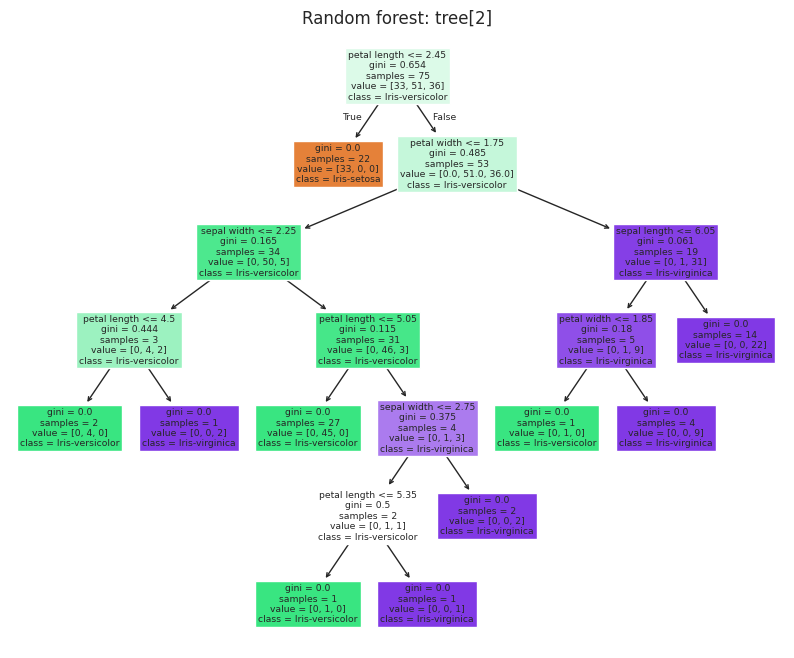

In [26]:
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(rf.estimators_[0], filled=True, class_names=y['class'].unique(), feature_names=X.columns)
plt.title("Random forest: tree[0]")
plt.show()
plt.figure(figsize=(10, 8))
plot_tree(rf.estimators_[2], filled=True, class_names=y['class'].unique(), feature_names=X.columns)
plt.title("Random forest: tree[2]")
plt.show()

In [28]:
y['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
# LIME
from lime.lime_tabular import LimeTabularExplainer
# Create LIME Explainer
explainer = LimeTabularExplainer(training_data=X.values, feature_names=X.columns, class_names=y['class'].unique(), mode='classification')

# Explain a prediction
i = 10  # Index of the sample to explain
exp = explainer.explain_instance(data_row=X.iloc[i].values, predict_fn=rf.predict_proba, top_labels=len(y['class'].unique()))

# Show explanation
exp.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
